In [209]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import time

from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.pipeline import make_pipeline

%matplotlib inline

from sklearn.model_selection import train_test_split



In [184]:
# læs data 
df_est = pd.read_pickle('job_kurser.pkl')

print(df_est.head())


# def dan_xy(index) :
#     y = np.array((np.log(df_est.iloc[index])))
#     X = np.array((np.log(df_est.iloc[index+14]))).reshape(-1, 1)
#     return X, y

# X, y = dan_xy(7)
# X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# X_train, X_eval, y_train, y_eval = train_test_split(X_dev, y_dev, test_size=.25, random_state=2)

# X_train


             Carlsberg   Coloplast  Danske Bank         DSV  Jyske Bank  \
Date                                                                      
2007-01-31  456.189545  101.200000   235.768773  102.263636  397.664091   
2007-02-28  480.336250  100.815000   247.720700   99.975000  428.416050   
2007-03-31  470.682727   94.413636   233.739318   96.081818  400.536455   
2007-04-30  485.811778   94.594444   237.665111  103.672222  418.761556   
2007-05-31  528.809850   97.145000   226.807400  115.155000  404.439550   

               Nordea  Novo Nordisk   Novozymes     Vestas        Tryg  \
Date                                                                     
2007-01-31  89.079545     48.022727  102.440909  90.772727  242.977273   
2007-02-28  90.075000     51.272500   99.295000  93.835000  277.125000   
2007-03-31  86.704545     48.602273   98.013636  90.781818  284.295455   
2007-04-30  92.750000     53.472222  104.655556  93.572222  343.833333   
2007-05-31  92.850000     57.0

## Structure data

In [195]:
col_kurs = list(df_est.iloc[:,:13])
col_post = list(df_est.iloc[:,-13:])
print(col_kurs)
l = len(df_est)

container = pd.DataFrame(columns=['stock_price', 'job_postings', 'company'])
for i in range(len(col_kurs)) :
    yserie = np.log(df_est[col_kurs[i]]).shift(periods=-1)
    xserie = (df_est[col_post[i]])
    tmp = pd.DataFrame(pd.concat([yserie.iloc[:-1], xserie.iloc[:-1]], axis=1, ignore_index=True))
    tmp.columns=(['stock_price', 'job_postings'])
    tmp['company']=col_kurs[i]
    container = pd.concat([container, tmp], axis=0, ignore_index=True)
print(container)

['Carlsberg', 'Coloplast', 'Danske Bank', 'DSV', 'Jyske Bank', 'Nordea', 'Novo Nordisk', 'Novozymes', 'Vestas', 'Tryg', 'H. Lundbeck', 'Alm. Brand', 'SAS']
     stock_price job_postings    company
0       6.174486           22  Carlsberg
1       6.154184            8  Carlsberg
2       6.185821           16  Carlsberg
3       6.270629           30  Carlsberg
4       6.275957            9  Carlsberg
5       6.333669           17  Carlsberg
6       6.346503           13  Carlsberg
7       6.365787            7  Carlsberg
8       6.370812           21  Carlsberg
9       6.261834           19  Carlsberg
10      6.236962           31  Carlsberg
11      6.143526           23  Carlsberg
12      6.105924           34  Carlsberg
13      6.195010           36  Carlsberg
14      6.233448           20  Carlsberg
15      6.268969           41  Carlsberg
16      6.193231           14  Carlsberg
17      6.040876           22  Carlsberg
18      6.099732           33  Carlsberg
19      6.081492        

In [230]:
container0 = container.fillna(0)#nan_to_num(container)
#banks=['Carlsberg']#, 'Danske Bank', 'DSV', 'Jyske Bank', 'Nordea', 'Vestas', 'Tryg', 'Alm. Brand', 'H. Lundbeck']
banks=['Nordea', 'Danske Bank', 'Jyske Bank', 'Alm. Brand', 'Tryg']
df_bank = container0[container0.company.isin(banks)]

#input_data = pd.get_dummies(container0, columns=['company'])
input_data = pd.get_dummies(df_bank, columns=['company'])
print(input_data.head())

input_data_l1 = input_data.shift()

# dan X og y
y = np.array(input_data['stock_price'])
X = np.array(input_data.iloc[:,1:])

# dan training og test
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

print(X_dev.shape, y_dev.shape)
print(X_test.shape, y_test.shape)
y = np.nan_to_num(y, copy=False)



    stock_price  job_postings  company_Alm. Brand  company_Danske Bank  \
94     5.512302          29.0                   0                    1   
95     5.454206          45.0                   0                    1   
96     5.470863          23.0                   0                    1   
97     5.424101          56.0                   0                    1   
98     5.363661          73.0                   0                    1   

    company_Jyske Bank  company_Nordea  company_Tryg  
94                   0               0             0  
95                   0               0             0  
96                   0               0             0  
97                   0               0             0  
98                   0               0             0  
(176, 6) (176,)
(59, 6) (59,)


## Regression

R^2 Train: 0.873, test: 0.780


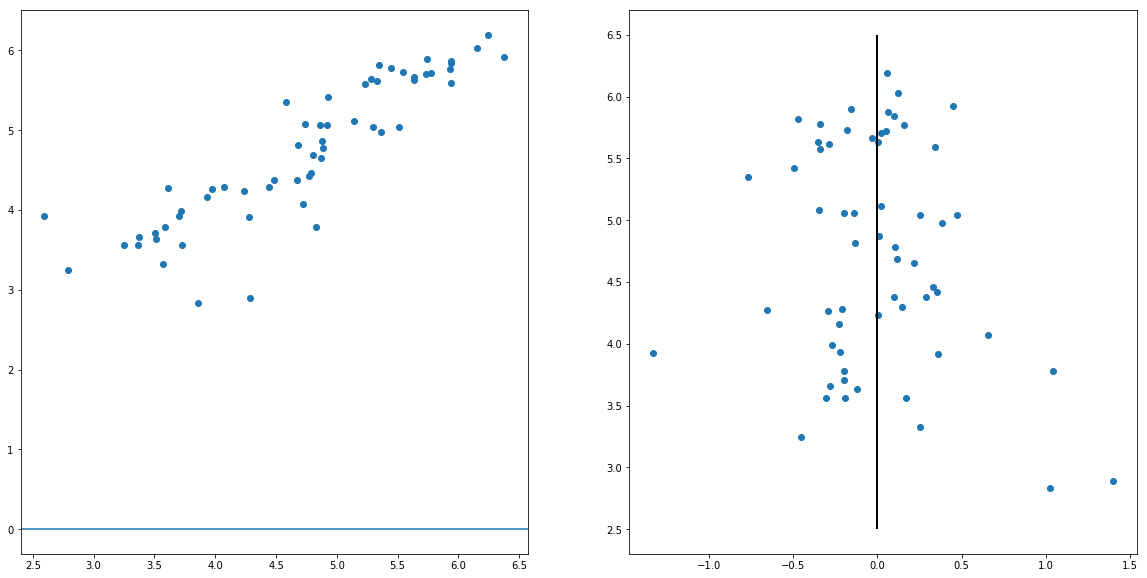

In [236]:
from sklearn.metrics import r2_score

pipe_lr = make_pipeline(PolynomialFeatures(include_bias=False),
                        StandardScaler(),
                        LinearRegression())

pipe_lr.fit(X_dev, y_dev)


#print("Beta =", pipe_lr.coef_[0])
#print('Alpha = ', pipe_lr.intercept_)

y_dev_hat = pipe_lr.predict(X_dev)
y_test_hat = pipe_lr.predict(X_test)


print('R^2 Train: %.3f, test: %.3f' % (r2_score(y_dev, y_dev_hat), r2_score(y_test, y_test_hat)))

#plt.scatter(X_test[:,0], y_test)

fig, ax = plt.subplots(1,2, figsize=(20,10))
#ax[0].set_ylim(2.5,6.5)
#ax[1].set_ylim(2.5,6.5)
ax[0].scatter(y_test, pipe_lr.predict(X_test))
ax[1].scatter((y_test-pipe_lr.predict(X_test)), pipe_lr.predict(X_test))
ax[1].vlines(x=0, ymin=2.5, ymax=6.5, color='black', lw=2)

ax[0].axhline()
#x = np.linspace(*ax[0].get_xlim())
#ax[0].plot(x, x)

## Lasso

### Pure lasso

In [225]:
perform = []

alphas = np.logspace(-10,-3,33)

for alpha_ in alphas:
    
    pipe_lasso = make_pipeline(PolynomialFeatures(include_bias=False),
                                 StandardScaler(),
                                 Lasso(alpha=alpha_, random_state=1))
    pipe_lasso.fit(X_dev, y_dev)
    perform.append([alpha_, np.sqrt(mse(pipe_lasso.predict(X_test),y_test))])
    
pf = pd.DataFrame(perform)
headers = ['alpha', 'RMSE_test']
pf.columns = headers
pf.set_index('alpha')
print(pf)
pf.nsmallest(1, 'RMSE_test')



           alpha  RMSE_test
0   1.000000e-10   0.382083
1   1.654817e-10   0.382083
2   2.738420e-10   0.382083
3   4.531584e-10   0.382083
4   7.498942e-10   0.382083
5   1.240938e-09   0.382083
6   2.053525e-09   0.382083
7   3.398208e-09   0.382083
8   5.623413e-09   0.382083
9   9.305720e-09   0.382083
10  1.539927e-08   0.382083
11  2.548297e-08   0.382083
12  4.216965e-08   0.382083
13  6.978306e-08   0.382083
14  1.154782e-07   0.382083
15  1.910953e-07   0.382083
16  3.162278e-07   0.382084
17  5.232991e-07   0.382084
18  8.659643e-07   0.382084
19  1.433013e-06   0.382085
20  2.371374e-06   0.382085
21  3.924190e-06   0.382087
22  6.493816e-06   0.382089
23  1.074608e-05   0.382093
24  1.778279e-05   0.382099
25  2.942727e-05   0.382109
26  4.869675e-05   0.382126
27  8.058422e-05   0.382154
28  1.333521e-04   0.382201
29  2.206734e-04   0.382279
30  3.651741e-04   0.382411
31  6.042964e-04   0.382637
32  1.000000e-03   0.383028


,alpha,RMSE_test
0,1.000000e-10,0.382083


[5.25834137 5.21049226 6.12478064 5.97940462 6.18582126 6.27062892
 5.83887063 5.86743334 6.33477214 5.54239809 6.0814922  5.95988358]
[6.06771396 6.06771396 6.06771396 6.06771396 6.06771396 6.06771396
 6.06771396 6.06771396 6.06771396 6.06771396 6.06771396 6.06771396] [ 7. 17.  9.  7. 16. 30. 14. 10. 12. 10. 19. 11.]


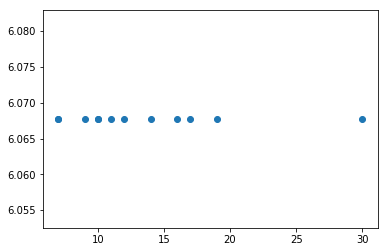

In [229]:
pipe_lasso = make_pipeline(PolynomialFeatures(include_bias=False),
                                 StandardScaler(),
                                 Lasso(alpha=0.382083, random_state=1))
pipe_lasso.fit(X_dev, y_dev)
y_hat = pipe_lasso.predict(X_test)
print(y_test)
print(y_hat, X_test[:,0])
plt.scatter(X_test[:,0], y_hat)


### kFold

In [ ]:
from sklearn.model_selection import KFold

kfolds = KFold(n_splits=5)

mseCV = []

lambdas =  np.logspace(-5, 4, 12)

for lambda_ in lambdas:
   
    pipe_lassoCV = make_pipeline(PolynomialFeatures(include_bias=False),
                                 StandardScaler(),
                                 Lasso(alpha=lambda_, random_state=1))    
    mseCV_ = []
    
    for train_idx, val_idx in kfolds.split(X_dev, y_dev):
        X_train, y_train = X_dev[train_idx], y_dev[train_idx]
        X_val, y_val = X_dev[val_idx], y_dev[val_idx] 

        pipe_lassoCV.fit(X_train, y_train)
        
        msetest = mse(pipe_lassoCV.predict(X_test), y_test)
        mseCV_.append(msetest)    
    mseCV.append(np.mean(mseCV_))

optimal = pd.Series(mseCV,index=lambdas).nsmallest(1)
print("Optimal lambda")
print("lambda"," "*5, "Mean MSE")
print(optimal)


## Bag of words

### Stopwords

In [119]:
import nltk
stopwords = nltk.corpus.stopwords.words('danish')


### Get data and fit the CountVectorizer

In [135]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

ny1 = pd.read_pickle('both1.pkl')
ny2 = pd.read_pickle('both2.pkl')
ny4 = pd.read_pickle('both4.pkl')

df_both = pd.concat([ny1, ny2, ny4], axis=0, join='inner', ignore_index=True)

#print("Shape", df_both.shape)
#print("\n")
#print(df_both.head(1), "\n", df_both.tail(2))

desc = df_both.sample(60000, random_state=5)

#print(desc)


t0 = time.time()

count=TfidfVectorizer(ngram_range=(1, 3), max_df=.1, max_features=5000)
bag = count.fit_transform(desc['job_describ'].values)

t1 = time.time()

print("Procestid er", int((t1-t0)/60), "minutter og", round((t1-t0)%60, 2), "sekunder")

# 10000 linier: Procestid er 0 minutter og 0.78 sekunder

Procestid er 0 minutter og 17.5 sekunder


In [136]:
t0 = time.time()

X = count.transform(desc['job_describ'])

t1 = time.time()

print("Procestid er", int((t1-t0)/60), "minutter og", round((t1-t0)%60, 2), "sekunder")

# 10000 linier: Procestid er 0 minutter og 0.49 sekunder

Procestid er 0 minutter og 6.59 sekunder


In [137]:
print(X.shape)
# print(type(X))


(60000, 5000)


## LatentDirichletAllocation

In [138]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=20, random_state=5, learning_method='batch')
t0 = time.time()

X_topics = lda.fit_transform(X)

t1 = time.time()

print("Procestid er {} minutter og {} sekunder".format(int((t1-t0)/60),round((t1-t0)%60, 2)))

# 10000 linier: Procestid er 0 minutter og 30.01 sekunder

Procestid er 2 minutter og 25.17 sekunder


In [91]:
print(lda.components_.shape)


(10, 2000)


In [139]:
n_top_words = 15
feature_names = count.get_feature_names()
for cat_idx, cat in (enumerate(lda.components_)) :
    print("Category %d:" % (cat_idx + 1))
    print(" ".join([feature_names[i] for i in cat.argsort()[:-n_top_words - 1:-1]]))
    

Category 1:
medarbejder muligt medarbejder til rengøring vi søger hurtigst hurtigst muligt en medarbejder til rengøring vi søger en frisk mangler och muligt en søges
Category 2:
kan det er du dig så skal kan du have god du er måske være for at så er du skal
Category 3:
timer pr 37 37 timer uge pædagog 30 snarest eller ugen 2009 om ugen 2010 pr uge timer pr
Category 4:
være være med vil du du være vil du være med til med til at være med til du være med del af en del en del af være en udvikle være en del
Category 5:
søges søges til dygtig til vores søger vi vi søger en dygtig snarest tiltrædelse vi søger en søger vi en vi en søges en job fra et job fra
Category 6:
efter løn overenskomst aftale efter aftale løn efter eller efter henhold henhold til nyt eller efter aftale løn og et nyt mail løn efter aftale
Category 7:
for at blive oprettet konsulenter kontakt med en vores konsulenter med en af du kontakt du kontakt med blive oprettet af vores konsulenter at blive virksomhedsbruger skal du

In [86]:
cat5 = X_topics[:, 4].argsort()[::-1]

for iter_idx, post_idx in enumerate(cat5[:3]) :
#    print(iter_idx, post_idx)
    print(desc['job_describ'].iloc[post_idx], "\n")

Sondrup Bilcenter A/S er en moderne handelsvirksomhed i stadig ekspansion. Vi er autoriseret Volvo og Renault forhandler, og har 5 afdelinger i Østjylland, med hovedkontor i Viby. Sondrup Bilcenter A/S ha 

Hos Euromaster Danmark A/S har vi søger vi en montør/udemontør til vores center i Skejby Om jobbet: - Montering af dæk på biler lastbiler og... 

Er du en ildsjæl der har lyst til at være med på holdet der udvikler fælles ledelsesinformation i en af Danmarks største virksomheder - så... 

